In [1]:
# مكتبة التعامل مع بيئات الأتاري
!pip install ale_py
# مكتبة التعلم المُعزز
!pip install stable_baselines3
# تحديث مكتبة الأفلام
!pip install --upgrade moviepy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
# استيراد مكتبة التعامل مع الألعاب
import ale_py

In [3]:
# دالة إنشاء بيئة أتاري
from stable_baselines3.common.env_util import make_atari_env

In [4]:
# معرف البيئة
env_id= 'ALE/Riverraid-v5'
#env_id= 'ALE/Pong-v5'
#env_id= 'ALE/Breakout-v5'
#env_id= 'ALE/MsPacman-v5'
#env_id= 'ALE/MarioBros-v5'

# إنشاء البيئة
env = make_atari_env(env_id, seed=0)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [110, 156,  66],
        [110, 156,  66],
        [110, 156,  66]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
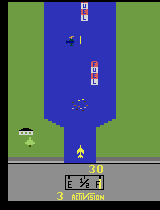

In [5]:
# إعادة التهيئة
obs = env.reset()
# الإظهار
env.render()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# مسار مجلد العمل
working_folder='/content/drive/MyDrive/RLModels/'

In [18]:
# عدد دورات التدريب
total_timesteps=5000

In [19]:
# اسم اللعبة
id=env_id.split('/')[-1]
# اسم النموذج
model_name=f"PPO_{id}_{total_timesteps}"

In [20]:
# مسار حفظ النموذج
model_PPO_file_path=working_folder+model_name

In [23]:
# استيراد PPO
from stable_baselines3 import PPO
# تحميل النموذج
model_PPO = PPO.load('/content/drive/MyDrive/RLModels/PPO_Riverraid-v5_50000.zip', verbose=0)


In [24]:
# عدد حلقات الاختبار
episodes=32

In [25]:
# استخدام النموذج في اللعب
episodes_total_reward=0
reward_history_after_ppo = []
frames=[]
for episode in range(episodes):
    obs  = env.reset()
    frames.append(env.render())
    done = False
    total_reward = 0
    while not done:
        action, _ = model_PPO.predict(obs, deterministic=True)
        obs, reward, done, infos = env.step(action)
        frames.append(env.render())
        total_reward += reward[0]
    reward_history_after_ppo.append(total_reward)
    episodes_total_reward+=total_reward
    print(f"PPO After Training - Episode {episode + 1} - Total Reward: {total_reward}")
print(f"PPO Mean reward: {round(episodes_total_reward/episodes,2)}")

PPO After Training - Episode 1 - Total Reward: 18.0
PPO After Training - Episode 2 - Total Reward: 1.0
PPO After Training - Episode 3 - Total Reward: 0.0
PPO After Training - Episode 4 - Total Reward: 5.0
PPO After Training - Episode 5 - Total Reward: 21.0
PPO After Training - Episode 6 - Total Reward: 0.0
PPO After Training - Episode 7 - Total Reward: 1.0
PPO After Training - Episode 8 - Total Reward: 1.0
PPO After Training - Episode 9 - Total Reward: 19.0
PPO After Training - Episode 10 - Total Reward: 1.0
PPO After Training - Episode 11 - Total Reward: 0.0
PPO After Training - Episode 12 - Total Reward: 1.0
PPO After Training - Episode 13 - Total Reward: 18.0
PPO After Training - Episode 14 - Total Reward: 2.0
PPO After Training - Episode 15 - Total Reward: 5.0
PPO After Training - Episode 16 - Total Reward: 4.0
PPO After Training - Episode 17 - Total Reward: 17.0
PPO After Training - Episode 18 - Total Reward: 5.0
PPO After Training - Episode 19 - Total Reward: 1.0
PPO After Traini

In [26]:
# دالة إنشاء فيديو
from moviepy import ImageSequenceClip

In [27]:
# مسار مجلد الفيديو
clips_folder='/content/drive/MyDrive/ملفات الاكواد/09. Atari Games ألعاب الأتاري/AtariVideos'
# اسم ملف الفيديو
clip_file_name=f"trained_{id}.mp4"
# مسار ملف الفيديو
clip_file_path = clips_folder + clip_file_name

In [28]:
print("Creating video, please wait...")
# إنشاء الفيديو
clip = ImageSequenceClip(frames, fps=10)


Creating video, please wait...


In [29]:
# حفظ الفيديو
clip.write_videofile(clip_file_path)


MoviePy - Building video /content/drive/MyDrive/ملفات الاكواد/09. Atari Games ألعاب الأتاري/AtariVideostrained_Riverraid-v5.mp4.
MoviePy - Writing video /content/drive/MyDrive/ملفات الاكواد/09. Atari Games ألعاب الأتاري/AtariVideostrained_Riverraid-v5.mp4



MoviePy - Done !
MoviePy - video ready /content/drive/MyDrive/ملفات الاكواد/09. Atari Games ألعاب الأتاري/AtariVideostrained_Riverraid-v5.mp4


In [30]:
# إغلاق البيئة
env.close()

print(f"Video saved as {clip_file_name}")

Video saved as trained_Riverraid-v5.mp4
